### 入力と出力があるデータからの異常検知
前回までは、データとして与えられていたのは$\{ x^{(1)}, ... , x^{(N)}\}$のような形でした。  
今回では、入力と出力が対になって観測される場合の異常検知手法を考えます。

入力は、$M$次元として$x$という記号で表し、それに対する出力を$y$という記号で表します。記述の簡単のため、出力は1次元$y$とします。  
訓練データとして、入力と出力の組が$D=\{(x^{(1)}, y^{(1)}), ... , x^{(N)}, y^{(N)})\}$のように$N$個与えられていると考えます。これから、  
系の振る舞いのパターンをモデル化し、異常を検知する手法を導くことが目標です。  

#### 入出力がある場合の異常検知の考え方
入力と出力が観測される場合、最も自然な異常検知の方法は、与えられた入力に対して出力を眺めて、それが通常の振る舞いから期待される値から  
大幅にずれているかどうかをみる、というのが1つ考えられます。より形式的に言えば、  
  
(1) 系は、入力$x$が与えられたときに、値$f(x)$が出力として返すように設計されている  
(2) したがって、ある任意の観測点$x^{'}$が与えられたときに期待される出力値は $f(x^{'})$である  
(3) もし、出力の実測値$y^{'}$が、期待値$f(x^{'})$と大幅にずれていたら異常を疑う  
  
この手順を最も素直に表すとしたら、例えば次のようなモデルを設定できます。  
  
$$
p(y|x)=N(y|f(x), \sigma^{2})
$$
  
つまり、実際の観測値は、期待値$f(x)$の周りに、分散$\sigma^{2}$の正規分布でばらつく、と考えられます。  
もともとの正規分布は、ガウスが天文データを解析していた時にごさの解析の手段として導入されたもので、自然なモデルと考えられます。  
この式は単なる1次元の正規分布なので、初回に説明したホテリング理論と類似したやり方で異常度が定義できると予測できます。  

ここでの問題は、関数$f$およびパラメータ$\sigma^{2}$をどのデータから学習するか、という点です。  
これは、任意の入力$x$に対してその出力$y$の確率分布を求める問題です。$x$をもとに、それが属するであろう出力値$y$の世界に帰属させてあげる  
という語感から、**回帰問題**と呼びます。回帰問題は、分類問題と並んで統計的機械学習で最も重要な問題です。  
入力と出力を含むデータに対する異常検知の問題は、(確率的)回帰問題をその部分として含み、それに加えて、異常度と閾値の適切な定義という  
タスクが加わります。  なお、上記では１次元の正規分布を考えていますが、任意の確率分布を想定することが原理的には可能です。  
この点の確率的なモデリング手法の相違により、様々なモデルが考えられます。

いったん、手順をまとめると下記のようになります。  
  
0) 準備: 系の機構ないしは動作についての事前知識をもとに、入力と出力の間に成り立つであろう関数形$y=f(x)$を、何かのパラメータを含んだ形で
    仮定しておく。また、出力値のばらつきについての事前知識をもとに、例えば$p(y|x)=N(y|f(x), \sigma^{2})$のような適切な観測モデルを
    仮定しておく。  
  
1) ステップ1 分布推定: データ$D$をもとに回帰問題を解き、関数$f$のパラメータを求める。それにより、任意の$x$が与えられたときの,
    $y$の予測分布$p(y|x, D)$を求める。  
  
2) ステップ2 異常度の定義: 典型的には、予測分布をもとに、新たに観測された1点(y^{'}, x^{'})に対する負の対数尤度$-Inp(y^{'}|x^{'}, D)$を異常度とする  
  
3) ステップ3 閾値の設定: 可能であれば、異常度についての確率分布を用いて、それが難しければ訓練データに基づく分位てんの情報を使って、適切な  
    閾値を与えて、異常を判定する。

#### 線形回帰モデルによる異常検知
確率的な考え方から線形回帰モデルを導き、それを用いた異常検知の方法について考えます。  
  
線形回帰モデルでは、関数$f$として次のような1次関数(線形関数)を考えます。  
  
$$
f(x) = \alpha_{0} + \alpha^{T}x = \alpha_{0} + \alpha_{1}x_{1} + \alpha_{2}x_{2} + \alpha_{M}x_{M}
$$
  
$\alpha_{0}, ... , \alpha_{M}$という$M+1$個の係数は、データから定められるべき定数です。ここで考えるのは、データ$D$をもとに、確率モデル  
  
$$
p(y| x) = N(y|\alpha_{0} + \alpha^{T}x, \sigma^{2}) = \frac{1}{ \sqrt{2\pi\sigma^{2}} }exp\left [ \frac{1}{2\sigma^{2}}(y-\alpha_{0}-\alpha^{T}x)^{2} \right]
$$
  
に含まれるパラメータ$\alpha_{0}, \alpha$, $\sigma^{2}$の最も良さそうな値を1つ決めるという問題です。この問題は、パラメータを単一の数値の  
組として『１つ』だけ決めるので**点推定**と呼ばれます。このパラメータを決定する手順は具体的にみていきます。

まずは、下記のような量を定義します。  
  
$$
y_{N} \equiv \left [y^{(1)}, ..., y^{(N)} \right]^{T}, X \equiv \left [x^{(1)}, ..., x^{(N)} \right]
$$
  
$y_{N}$は$N$次元の列ベクトル、$X$は$M \times N$次元のデータ行列です。$X$は回帰問題の文脈では特に、**計画行列**などと呼ばれます。  
入力$x$を配置する実験計画を表しているようなイメージです。

#### 最小二乗法としての最尤推定
$D$における$N$個の観測値が統計的に独立であるとの想定の下では、入出力の区別がない場合、未知のパラメータ$\alpha_{0}, \alpha$, $\sigma^{2}$に対する尤度関数は、$N$個の標本の寄与の積として、次のように定義できます。  
  
$$
p(D | \alpha_{0}, \alpha, \sigma^{2}) = \prod_{n=1}^{N}N(y^{(n)}|\alpha_{0} + \alpha^{T}x^{(n)}, \sigma^{2})
$$
  
これは、１変数正規分布の最尤推定の式  
  
$$
p(D | \theta) \equiv \prod_{n=1}^{N}p(x^{(n)}|\theta) = \prod_{n=1}^{N}N(x^{(n)}|\mu, \sigma^{2})
$$
  
において、正規分布の部分を置き換えたものにすぎないことに留意しましょう。  
正規分布の定義式を用いて両辺の対数を計算すると、対数尤度関数は次のようになります。  
  
$$
L(\alpha_{0}, \alpha, \sigma^{2}|D) = - \frac{N}{2}ln(2\pi\sigma^{2}) - \frac{1}{2\sigma^{2}}\sum_{n=1}^{N}\left [y-\alpha_{0}-\alpha^{T}x^{(n)} \right]^{2}
$$
  
まず$\alpha_{0}$について最尤解を求めてみます。上の式を$\alpha_{0}$で微分して0と等値することにより、容易に
  
$$
\hat\alpha_{0}=\frac{1}{N}\sum_{n=1}^{N}\left [y^{(n)}-\alpha^{T}x^{(n)} \right] = \bar y -  \alpha^{T} \bar x
$$
  
が得られます。ただし$y$と$x$それぞれについての標本平均を、
  
$$
\bar y \equiv \frac{1}{N}\sum_{n=1}^{N}y^{(n)}, \bar x \equiv \frac{1}{N}\sum_{n=1}^{N}x^{(n)}
$$
  
のように定義しました。$\alpha_{0}$はすでにもとまったので、入力、出力ともに中心化してまとめた、
  
$$
\bar y_{N} \equiv H_{N}y_{N} = [y^{(1)} - \bar y, ... , y^{(N)} - \bar y]^{T}
$$
$$
\bar X \equiv XH_{N} = \left[ x^{(1)} - \bar x, ... , x^{(N)} - \bar x \right]
$$
  
というものを定義して、対数尤度の式から$\alpha_{0}$を消去することを考えます。式
  
$$
L(\alpha_{0}, \alpha, \sigma^{2}|D) = - \frac{N}{2}ln(2\pi\sigma^{2}) - \frac{1}{2\sigma^{2}}\sum_{n=1}^{N}\left [y-\alpha_{0}-\alpha^{T}x^{(n)} \right]^{2}
$$
  
に代入して整理すると、次のようになります。  
  
$$
L(\alpha_{0}, \alpha, \sigma^{2}|D) = -\frac{N}{2}ln(2\pi\sigma^{2}) - \frac{1}{2\sigma^{2}} \parallel \tilde y_{N} - \tilde X^{T}\alpha \parallel ^{2}
$$
  
次に、$\alpha$について最尤解を求めてみます。式$L(\alpha_{0}, \alpha, \sigma^{2}|D) = - \frac{N}{2}ln(2\pi\sigma^{2}) - \frac{1}{2\sigma^{2}}\sum_{n=1}^{N}\left [y-\alpha_{0}-\alpha^{T}x^{(n)} \right]^{2}$で与えられる対数尤度を最大化する$\alpha$を求めることになりますが、$\alpha$に依存するのは、最後の項だけなので、  
  
$$
\parallel \tilde y_{N} - \tilde X^{T}\alpha \parallel ^{2} = \sum_{n=1}^{N}\left [y^{(n)}-\bar y -\alpha^{T}(x^{(n)} - \bar x) \right]^{2} \rightarrow 最小化
$$
  
という最適化問題を解くことになります。  
この量は、観測値$y^{(n)}$と、モデル$f(x) = \alpha_{0} + \alpha^{T}x = \alpha_{0} + \alpha_{1}x_{1} + \alpha_{2}x_{2} + \alpha_{M}x_{M}$による予測値との食い違いの２乗を、全訓練データに対して加えたものになります。食い違い自体は、プラスにもマイナスにもなるので、２乗することで、  
正味のずれの大きさを評価する量となっています。これはいわゆる、平均二乗誤差(の$N$倍)に他なりません。  
  
**すなわち、係数$\alpha$についての最尤推定は、最小二乗誤差と等価です。**
  


ここまでできてきたので、実際に、$\alpha$の最尤解$\hat\alpha$を具体的に求めていきます。上の式の左辺を整理すると  
  
$$
\bar y_{N}^{T} \tilde y_{N} - 2\alpha^{T}\tilde X \tilde y_{N} + \alpha^{T}\tilde X \tilde X^{T} \alpha
$$
  
となります。ここで、微分公式と$\alpha$で微分してゼロベクトルと等値すると、方程式
  
$$
-2 \tilde X \tilde y_{N} + 2\tilde X \tilde X^{T}\alpha = 0
$$
  
が得られます。$\tilde X \tilde X^{T}$は$M \times M$次元の対称な正方行列でうが、これが正則である(つまり、逆行列が計算できる)ことを  
仮定すれば、$\alpha$の最尤解$\hat\alpha$が  
  
$$
\hat\alpha = [\tilde X \tilde X^{T}]^{-1}\tilde X \tilde y_{N}
$$
  
のように得られます。この解は、**普通の最小二乗法**による解と呼ばれます。  
  
一方、$\sigma$の最尤解については、$\sigma^{2}$で微分して0と等値することで容易に得られます。  
  
$$
\hat \sigma^{2} = \frac{1}{N}\sum_{n=1}^{N}\left [y^{(n)}-\bar y - \hat\alpha^{T}(x^{(n)} - \bar x) \right]^{2}
$$

#### 異常度の定義
最尤推定により、確率モデルの式$p(y| x) = N(y|\alpha_{0} + \alpha^{T}x, \sigma^{2}) = \frac{1}{ \sqrt{2\pi\sigma^{2}} }exp\left [ \frac{1}{2\sigma^{2}}(y-\alpha_{0}-\alpha^{T}x)^{2} \right]$のパラメータ$\alpha_{0}, \alpha$, $\sigma^{2}$が求まったので、異常度の定義をします。  
  
観測量$(y^{'}, x^{'})$についての異常度は、この１点に関する負の対数尤度をもとにして、  
  
$$
a(y^{'}, x^{'}) \equiv \frac{1}{\hat\sigma^{2}} \left [y^{'}-\bar y - \hat\alpha^{T}(x^{'} - \bar x) \right]^{2}
$$

これは、見かけ上、1変数のマハラノビス距離による異常値と類似しており、唯一の違いは、ホテリング理論における標本平均$\hat \mu$が、ここでは$\bar y + \hat\alpha^{T}(x^{'} - \bar x)$という量に置き換わっていることです。  $\hat \alpha$は、観測量$\{ (y^{(n)}, x^{(n)})\}$に関するやや複雑な関数になっており、そのためホテリング理論のように、  『最尤推定量のばらつきを表す確率分布を明示的に求める』ことが簡単ではありません。  
  
この場合は、異常度のデータに改めて確率分布を当て嵌めるか、あるいはより手軽に分位点の方法を用います。  

一応、ここまでで線形回帰による異常検知の枠組みはできたのですが、$\left[ \tilde X \tilde X^{T} \right]^{-1}$の計算が、特に次元$M$が数十になるような場合、頻繁に支障をきたします。とくに$M$個の変数のうち何個かに「ダブリ」重複がある場合、**多重共線性**があるといいます。

### リッジ回帰モデルと異常検知
線形回帰における普通の最小二乗解は、数値的不安定性という困難を抱えており、この困難を回避できる手法であるリッジ回帰をみます(理論は割愛)

実際の観測量では、すべて変数$x$が独立ではなく互いに関連があるため、行列のランクが不足して逆行列が求まりません。
そこで、リッジ回帰を使って$\alpha, \sigma^{2}$を求めています。リッジ回帰での$\hat{\alpha}_{ridge}$は、 以下の様に求まります。

$$
\hat{\alpha}_{ridge} = \left [ \tilde{X}^T \tilde{X} + \lambda I_M \right ]^{-1} \tilde{X}^T \tilde{y}
$$

分散$\hat{\sigma}^2_{ridge}$は、次のようになります。
$$
\hat{\sigma}^2_{ridge} = \frac{1}{N} \left \{ \hat{\lambda} \hat{\alpha}^T_{ridge} \hat{\alpha}_{ridge} + \sum_{n=1}^N \left [ \tilde{y}^{(n)} - \hat{\alpha}^T_{ridge} \tilde{x}^{(n)} \right ] \right \}
$$

今回は、R datasetの[UScrime](https://vincentarelbundock.github.io/Rdatasets/datasets.html)を用いてリッジ回帰をみます。  

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# 観測データを取得
df = pd.read_csv("./DATA/UScrime.csv")

In [5]:
df

,Unnamed: 0,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
0,1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
1,2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
2,3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
3,4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
4,5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
5,6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682
6,7,127,1,111,82,79,519,982,4,139,97,38,620,168,0.042100,20.6993,963
7,8,131,1,109,115,109,542,969,50,179,79,35,472,206,0.040099,24.5988,1555
8,9,157,1,90,65,62,553,955,39,286,81,28,421,239,0.071697,29.4001,856
9,10,140,0,118,71,68,632,1029,7,15,100,24,526,174,0.044498,19.5994,705


In [15]:
vars_list = pd.Series(['M', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2', 'GDP', 'Ineq', 'Prob', 'Time'])
abbr = pd.Series(['14-24歳の男性の割合',
        '平均就学期間',
        '1960年における警察予算',
        '1959年における警察予算',
        '労働力率',
        '女性1000人当たりの男性の数',
        '州の人口',
        '1000人当たりの非白人数',
        '都市部男性(14-24歳)の失業率',
        '都市部男性(35-39)の失業率',
        '州の1人当たりGDP',
        '経済的不平等の度合い',
        '収監率',
        '刑務所での平均収監期間'])

In [16]:
pd.concat([vars_list, abbr], axis=1)

,0,1
0,M,14-24歳の男性の割合
1,Ed,平均就学期間
2,Po1,1960年における警察予算
3,Po2,1959年における警察予算
4,LF,労働力率
5,M.F,女性1000人当たりの男性の数
6,Pop,州の人口
7,NW,1000人当たりの非白人数
8,U1,都市部男性(14-24歳)の失業率
9,U2,都市部男性(35-39)の失業率


In [17]:
# データを変数にセット
X = df[vars_list].values
y = df['y'].values
N = len(y)
M = len(vars_list)

yという名前が付けられた変数を従属変数(目的変数)として、その他の変数をすべて予測変数(説明変数)とします。

In [18]:
# sklearnのRidge回帰を使って最適解を見つける
from sklearn.linear_model import Ridge

In [19]:
clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
pred = clf.predict(X)

Text(0, 0.5, 'Pred')

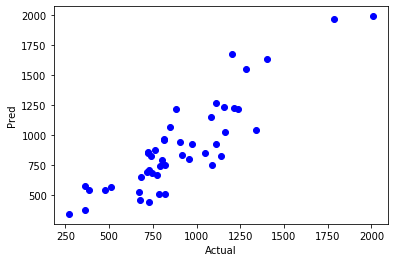

In [36]:
# UScrimeのデータ分布をプロット
plt.scatter(pred, y, color="blue")
plt.xlabel("Actual")
plt.ylabel("Pred")

In [23]:
# 異常度aを求めるための準備
lam = 1.0
coefs = clf.coef_
score = clf.score(X, y)

"coefs"は回帰変数を取り出す関数で、その第一成分が$\bar y$に対応しています。   
一般化交差検証の評価値が最小になるように回帰変数を選ぶのが一般的ですが、リッジ回帰による予測値とデータの実際の値を比べた上の図において比較して、選びます。45線上が完璧な一致を意味しますが、ばらつきはあるものの、ここでは概ね45線上の上にあることがわかります。

回帰の結果がもとまれば、データクレンジングの問題設定としてのリッジ回帰の式から求まる異常度の計算を  

$$
a^{(n)} = \frac{1}{(1-H_{n,n})^{2}\hat\sigma_{ridge}^{2}}\left [ y^{(n)} - \bar y - \hat \alpha_{ridge}^{T}(x^{(n)} - \bar x) \right] ^{2}
$$
  
をもとに計算します。  

In [25]:
sig2 = (lam*sum(coefs**2) + score)/N

In [27]:
y_bar = df['y'].mean()
X_bar = df[vars_list].mean().values

In [75]:
# 異常度
a = (y - y_bar - coefs.dot((X - X_bar).T))**2/sig2

In [76]:
a

array([2.34793372e+00, 9.22512237e+02, 8.14073882e+02, 5.82206043e+02,
       1.00373514e+02, 6.81794673e+01, 3.70549447e+02, 1.28720272e+03,
       3.11098349e+02, 9.38754657e+00, 3.83996028e+03, 2.62110954e+02,
       1.65821250e+03, 1.97446792e+02, 4.24537591e+02, 2.73356031e+01,
       6.46605929e+01, 5.71514378e+02, 1.97892999e+03, 2.78222792e+00,
       4.29539066e+01, 1.42587883e+03, 1.91218037e+03, 4.07350849e+02,
       3.66199219e+02, 4.85523055e+00, 8.94422363e+01, 8.55513499e+00,
       1.52430916e+03, 8.89088504e+00, 2.70298787e+00, 6.97202040e+01,
       8.48320445e+02, 4.06581971e+01, 1.59729845e+01, 4.46813021e+02,
       1.22232971e+02, 5.56079489e+01, 1.24034459e+02, 7.55990666e+01,
       2.41717805e+02, 4.18539849e+02, 1.69823666e+03, 3.10376806e+02,
       8.61218516e+02, 1.31486174e+03, 6.78329754e+02])

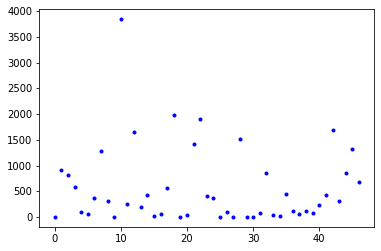

In [35]:
# UScrimeのデータ分布をプロット
plt.scatter(list(df.index), a, marker='.', color="blue")

In [70]:
weight = int(N*(1-0.05))
a_sorted = a #閾値
a_sorted.sort()

In [71]:
a_sorted

array([2.34793372e+00, 2.70298787e+00, 2.78222792e+00, 4.85523055e+00,
       8.55513499e+00, 8.89088504e+00, 9.38754657e+00, 1.59729845e+01,
       2.73356031e+01, 4.06581971e+01, 4.29539066e+01, 5.56079489e+01,
       6.46605929e+01, 6.81794673e+01, 6.97202040e+01, 7.55990666e+01,
       8.94422363e+01, 1.00373514e+02, 1.22232971e+02, 1.24034459e+02,
       1.97446792e+02, 2.41717805e+02, 2.62110954e+02, 3.10376806e+02,
       3.11098349e+02, 3.66199219e+02, 3.70549447e+02, 4.07350849e+02,
       4.18539849e+02, 4.24537591e+02, 4.46813021e+02, 5.71514378e+02,
       5.82206043e+02, 6.78329754e+02, 8.14073882e+02, 8.48320445e+02,
       8.61218516e+02, 9.22512237e+02, 1.28720272e+03, 1.31486174e+03,
       1.42587883e+03, 1.52430916e+03, 1.65821250e+03, 1.69823666e+03,
       1.91218037e+03, 1.97892999e+03, 3.83996028e+03])

In [72]:
threshold = a_sorted[weight]

In [73]:
threshold

1912.1803725935717

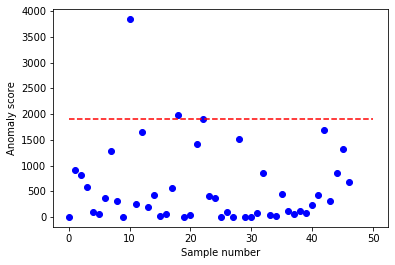

In [77]:
# 異常度のプロット、結果の描画
plt.plot(list(df.index), a, "o", color = "b")
plt.plot([0,50],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

異常度の結果は上のようになり、11, 19, 46番目の週が閾値を超えた高い異常度を示しています。  

### ベイズ的線形回帰モデルと異常検知
(ほぼ理論の話しかしないので、後日アップデートします)